In [1]:
from sklearn.datasets import make_circles

In [2]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
X.shape,Y.shape

((500, 2), (500,))

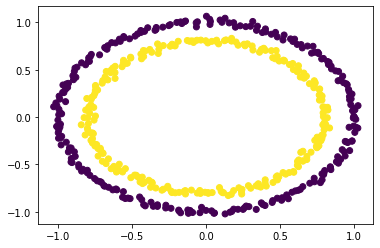

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [8]:
def phi(X):
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2+x2**2
    X_=np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=x3
    return X_

In [9]:
import numpy as np
X=phi(X)

In [10]:
X.shape

(500, 3)

In [14]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if(show==True):
        plt.show()
    return ax

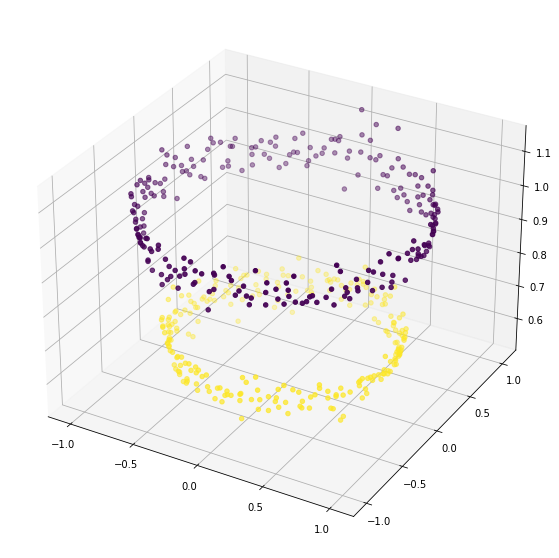

In [15]:
ax=plot3d(X)

Logistic Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [17]:
lr=LogisticRegression()

In [18]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy is %.4f"%(acc*100))

Accuracy is 100.0000


In [19]:
lr.fit(X,Y)

LogisticRegression()

In [20]:
wts=lr.coef_

In [21]:
bias=lr.intercept_

In [23]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [24]:
z=-(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81681514 0.81874548 0.82067582 0.82260617]
 [0.8171685  0.81909884 0.82102918 0.82295953]
 [0.81752186 0.8194522  0.82138254 0.82331288]
 [0.81787522 0.81980556 0.8217359  0.82366624]]


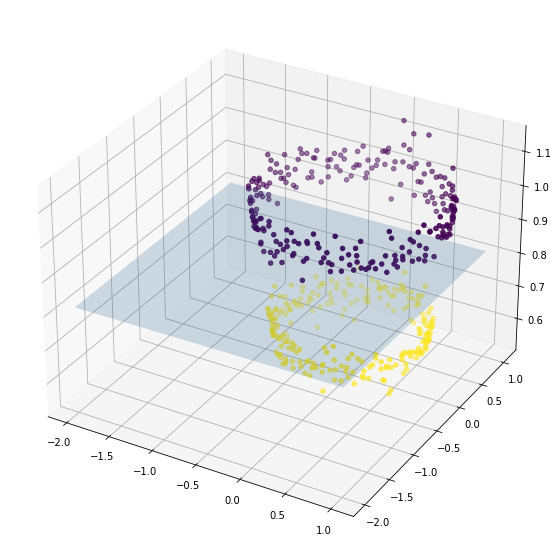

In [25]:
ax=plot3d(X,False)
ax.plot_surface(xx,yy,z,alpha=0.2)